
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In the second project, the dataset from the medical appointment data has been selected for analysis. The question that we will be exploring is whether the patients attended or did not attend an appointment. The main task in this project is to explore which variables from this data set can be a better predictor for not showing up for an appointment.

The folowing quastion has been answered in this project: 
#### 1) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#importing csv file and an overview of the data

df = pd.read_csv ('noshow.csv')

In [37]:
# Investigating the variables 
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
# Getting a first view of the data volume from each variable
df.count ()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [44]:
#checking the types of variables 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

# <a id='wrangling'></a>
## Data Wrangling

### Generating new variables from the exisitng.

After having an overview of the variables we've noticed two variables that need to be further calculated to provide users with useful information for our analyses. In this case, the variable "ScheduledDay" needed to be substracted from the variable "AppointmentDay" providing us the days difference from the time where the appointment was scheduled until the day that it was planed to be held. 


In [29]:
# First we needed to format the date format and then substract the variables from one another. 
# This code generated for us a new variable named "dif_day" as explained above.

df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')
df['dif_day'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

### Creating subsets
To make our analysis easier, we created two sub-datasets, df_a = respondents who showed up for the appointment and df_b= for respondents who did not show up.

In [7]:
# To make our analyses easier we created two datasets

df_a = df[df['No-show'] == 'No']
df_b = df[df['No-show'] == 'Yes']

In [8]:
# Droping duplicates from appointment Id rows
df.drop_duplicates(subset=['AppointmentID'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What is the best predictor if a patinet will or will not show for an appointment.

### 1. Difference in days
Difference in days was a variable calculated from two other variables (Scheduledday and Appointmentday) and it shows the difference in days from the day that the appointment was scheduled until the day that it was supposed to be held.

We calculated the mean for the first and the second dataset to see the differences in days.

In [50]:
# Mean of the days for the respondents who showed up for the appointment. 
df_a['dif_day'].mean()

7.7546594413205154

In [51]:
# Mean of the days for the respondents who showed up for the appointment. 
df_b['dif_day'].mean()

14.83148886598862

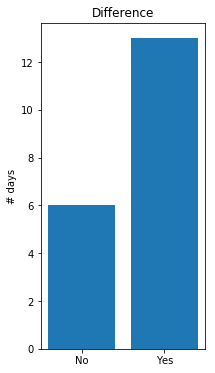

In [8]:
# Then I ploted the result from the descriptive analyses of the variable "dif_day" also to visualise 
# the difference in these two groups.

names = ['No', 'Yes']
values = [6, 13,]

plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.bar(names, values)
plt.title('Difference')
plt.ylabel("# days")
plt.show()


### 2. Age analyses
The fact that age is important to be analyzed because it can bring interesting insides on how the different age groups can react to having a scheduled appointment. Differences seen in the "Age", are indicators that Age can also be a predictor for not attending an medical appointment.

In [21]:
# mean age No-show=No
df_a['Age'].mean()

37.790064393252315

In [22]:
# mean age No-show=Yes
df_b['Age'].mean()

34.317666562121957

###### Visualisation 
We decided to visualize the "Age" variable in a histogram to see how different age groups interact with the both groups of the variable "No-show". 

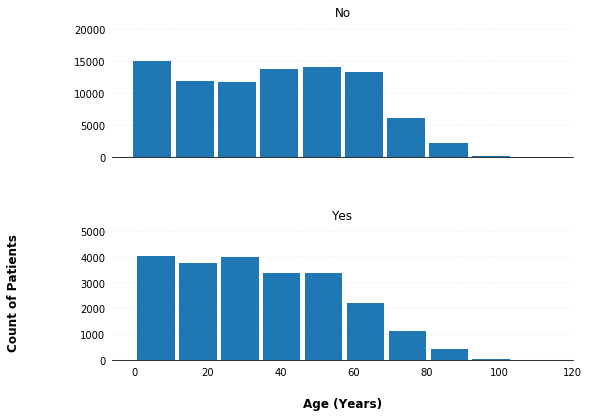

In [28]:
#Bar chart analysis for the "Age" variable by the "No-show" variable


ax = df.hist(column='Age', by='No-show', grid=False, figsize=(8,10), layout=(3,1), sharex=True, zorder=2,  rwidth=0.9)

for i,x in enumerate(ax):


    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
   

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Age (Years)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Count of Patients", labelpad=60, weight='bold', size=12,)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)


### SMS received - Variable analyses

We thought that this variable can be very interesting to analyze and find out how does receiving an SMS affects if someone shows up for an appointment.

First, we did some summary statistics to see how many people received an SMS from both groups, those who showed up and those who didn't. Then we created a stacked bar chart with the numbers from the summary statistics to have a better view of the differences in both groups. 

In [17]:
# Analyses of the variable "No-show=yes", by "SMS_Recived" (0=No, 1=Yes).

df[df['No-show'] == 'Yes'] .groupby('SMS_received')['No-show'].count()


SMS_received
0    12535
1     9784
Name: No-show, dtype: int64

In [14]:
# Analyses of the variable "No-show=yes", by "SMS_Recived" (0=No, 1=Yes)

df[df['No-show'] == 'No'] .groupby('SMS_received')['No-show'].count()


SMS_received
0    62510
1    25698
Name: No-show, dtype: int64

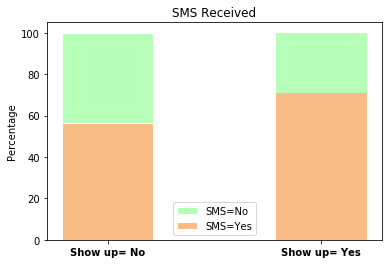

In [28]:
# Visualasing the data generated from the analyses above on a stackedbar graph.

r = [0,2]
raw_data = {'greenBars': [12535, 62510], 'orangeBars': [9784, 25698]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

 
# plot
barWidth = 0.85
names = ('Show up= No','Show up= Yes')

# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create green Bars
plt.bar(r, greenBars, color='#f9bc86', edgecolor='white', width=barWidth)


 
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")

# Custom X axis
plt.xticks(r, names, fontweight='bold')
#plt.xlabel("")
plt.ylabel ("Percentage")
plt.title ("SMS Received")
plt.legend(loc='best') 
plt.legend(['SMS=No', 'SMS=Yes'])
 
# Show graphic
plt.show()


<a id='conclusions'></a>

### Limitations
Among many important advantages, this project has its limitations. Based on my experience as a social worker  the component of the education/socio-economic level would be an informative source of information and also a good predictor for the variable "No-show". A second limitation would be my skill with the program itself, which has limited my opportunities to build models like, regression models or other correlation models considering multiple variables.   

## Conclusions

#### 1. Difference in day
In our data, we see that the best predictor for our analyses is the number of days from the scheduled day until the appointment day. Our analyses show that the difference is almost double (attending=7.75 days, not attendind=14.83 days). This translates to the assumption that if your appointment has a higher distance in days from the scheduled day you are more prone to skip the appointment.

#### 2. Age influence
Another smaller predictor that we found was age. In the age analyses graph, we see that people at a younger age (20s, 30s) are prone to not attend the appointment. On the other side, we see that starting from the 40 we number of people not attending the appoints starts to decrease. Another support for this theory comes from the mean age of both groups, where people who attended the appointment are around 3 years older compared to the others who did not attend the appointment. 

### SMS as a reminder
Our analyses here show an unexpected outcome. In our box plot, we can see that almost half of the people who did not go to the appointment have received an SMS. On the other hand, only 30 percent of the people who attended the appointment have received an SMS. This tells us that sending an SMS is not a very suitable/successful method to convince people to attend an appointment.





In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0